In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#load dataset
data = pd.read_csv("./files/credit_cards_data.csv") 

In [3]:
# read first ten rows of data
data.head(10) 
required_features = data.drop(columns=['isFlaggedFraud']) # drop result column from processed data
# print("\n\t target names: ", features)

# rename columns to be more descriptive
renamed_data = required_features.rename(columns={
    "type": "payment_method", 
    "nameOrig": "sender", 
    "oldbalanceOrg": "senders_old_bal",
    "newbalanceOrig": "senders_new_bal",
    "nameDest": "receiver",
    "oldbalanceDest": "receivers_old_bal",
    "newbalanceDest": "receivers_new_bal",
})
print( renamed_data)
print(renamed_data.shape) 


         step payment_method      amount       sender  senders_old_bal  \
0           1        PAYMENT     9839.64  C1231006815        170136.00   
1           1        PAYMENT     1864.28  C1666544295         21249.00   
2           1       TRANSFER      181.00  C1305486145           181.00   
3           1       CASH_OUT      181.00   C840083671           181.00   
4           1        PAYMENT    11668.14  C2048537720         41554.00   
...       ...            ...         ...          ...              ...   
6362615   743       CASH_OUT   339682.13   C786484425        339682.13   
6362616   743       TRANSFER  6311409.28  C1529008245       6311409.28   
6362617   743       CASH_OUT  6311409.28  C1162922333       6311409.28   
6362618   743       TRANSFER   850002.52  C1685995037        850002.52   
6362619   743       CASH_OUT   850002.52  C1280323807        850002.52   

         senders_new_bal     receiver  receivers_old_bal  receivers_new_bal  \
0              160296.36  M19797

In [4]:
#describing the data
print(renamed_data.shape) 
print(renamed_data.describe()) 

(6362620, 10)
               step        amount  senders_old_bal  senders_new_bal  \
count  6.362620e+06  6.362620e+06     6.362620e+06     6.362620e+06   
mean   2.433972e+02  1.798619e+05     8.338831e+05     8.551137e+05   
std    1.423320e+02  6.038582e+05     2.888243e+06     2.924049e+06   
min    1.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    1.560000e+02  1.338957e+04     0.000000e+00     0.000000e+00   
50%    2.390000e+02  7.487194e+04     1.420800e+04     0.000000e+00   
75%    3.350000e+02  2.087215e+05     1.073152e+05     1.442584e+05   
max    7.430000e+02  9.244552e+07     5.958504e+07     4.958504e+07   

       receivers_old_bal  receivers_new_bal       isFraud  
count       6.362620e+06       6.362620e+06  6.362620e+06  
mean        1.100702e+06       1.224996e+06  1.290820e-03  
std         3.399180e+06       3.674129e+06  3.590480e-02  
min         0.000000e+00       0.000000e+00  0.000000e+00  
25%         0.000000e+00       0.000000e+00  0

In [5]:
# #imbalance in the data
# fraud = data[data['isFraud'] == 1] # fraudulent transactions
# valid = data[data['isFraud'] == 0] # valid transactions
# outlierFraction = len(fraud)/float(len(valid)) 
# print(outlierFraction) 

# print(f"There are {len(fraud)} Fraudulent Transactions") 
# print(f"There are {len(valid)} Valid Transactions") 

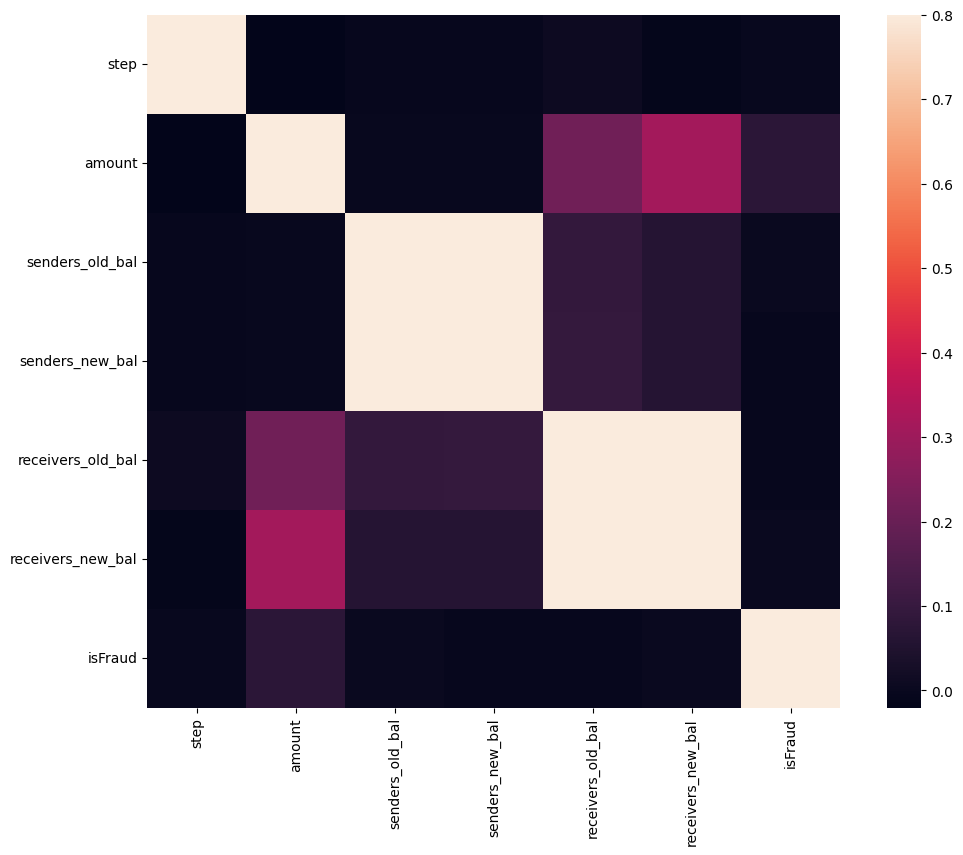

In [6]:
#plotting the correlation matrix
new_data = renamed_data.drop(columns=['payment_method', 'sender', 'receiver']) # remove non-numerical columns
sized_down_data = new_data[0:1000000]
dataframe_type = pd.DataFrame(sized_down_data)

corrmat = dataframe_type.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [49]:
#separating the X and the Y values
X = dataframe_type.drop(['isFraud'], axis = 1) # features
print(X.columns) 

Y = dataframe_type["isFraud"] # target
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
x_data = X.values 
y_data = Y.values 

Index(['step', 'amount', 'senders_old_bal', 'senders_new_bal',
       'receivers_old_bal', 'receivers_new_bal'],
      dtype='object')
(1000000, 6)
(1000000,)


In [88]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42) # increase test_size: 20%, 25%, 30%, 35% & 40%

In [89]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(n_estimators=50) 
rfc.fit(x_train, y_train) 


RandomForestClassifier(n_estimators=50)

In [90]:
y_pred = rfc.predict(x_test) # predict for all test data
print(y_pred) 

y_pred_ind = rfc.predict([x_test[5]]) # predict for random test individual data
print(y_pred_ind) 


[0 0 0 ... 0 0 0]
[0]


In [91]:
# models' accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999725


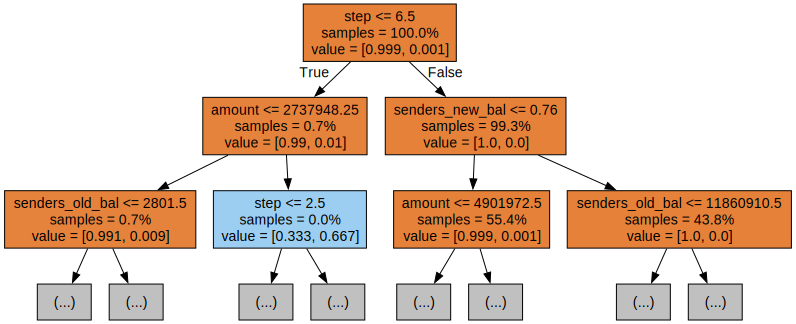

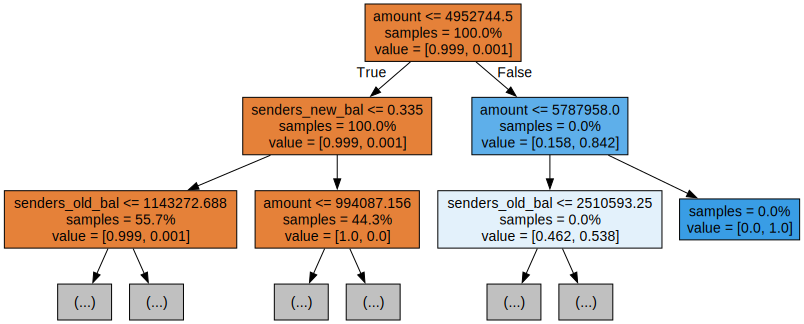

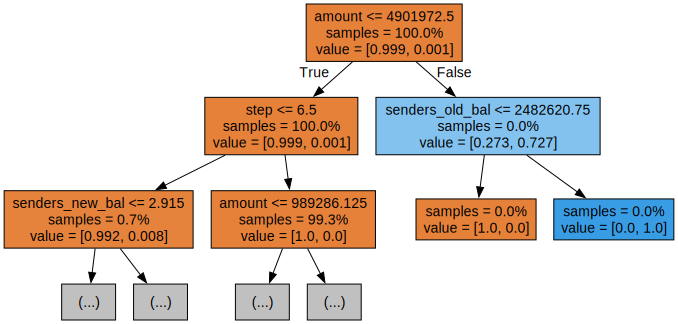

In [76]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
import graphviz 


for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [92]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
# n_outliers = len(fraud) 
# n_errors = (yPred != yTest).sum() 
# print("The model used is Random Forest classifier") 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 



The precision is 0.9607843137254902
The recall is 0.4803921568627451
The F1-Score is 0.6405228758169934
The Matthews correlation coefficient is0.6792763077456204


[[199896      2]
 [    53     49]]


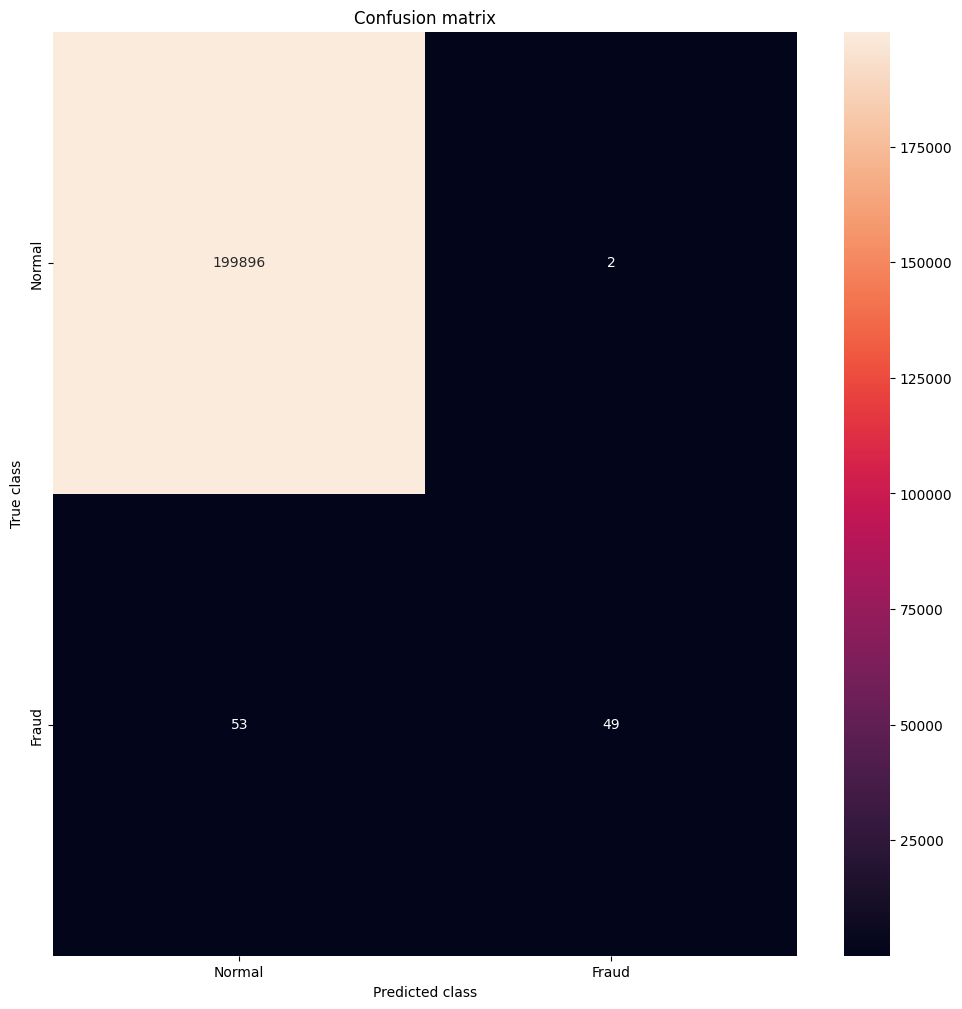

In [93]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix) 

plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 